### Vizualization of features stride by stride for Koopman Analysis 

### Results are consolidated on  https://drive.google.com/file/d/1u9FKJ-3q-vuGeqeTCbLBCBK9HjoF-aBm/view?usp=sharing  
### for the visualization of 21 extracted gait features (raw features, size-normalized and regression-normalized) 
### in two trials (walking, walking while talking) for healthy and Multiple Sclerosis subjects. 

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.utils import shuffle

In [23]:
path = 'C:\\Users\\purpl\\Box\\GAIT\\sample_data\\data_export\\'

In [24]:
#Reading the raw dataframe 
raw_df = pd.read_csv(path+'..\\..\\FinalCodes\\csv files\\gait_features.csv', index_col = 0)
#Dropping the NaNs
raw_df.dropna(inplace = True)
#Resetting the index
raw_df.reset_index(inplace= True)
print ('Raw data shape: ', raw_df.shape)

#Reading the Size-N dataframe 
sizeN_df = pd.read_csv(path+'..\\..\\FinalCodes\\csv files\\size_normalized_gait_features.csv', index_col = 0)
#Dropping the NaNs
sizeN_df.dropna(inplace = True)
#Resetting the index
sizeN_df.reset_index(inplace= True)
print ('Size-N data shape: ', sizeN_df.shape)

#Reading the Regress-N dataframe 
regressN_df = pd.read_csv(path+'..\\..\\FinalCodes\\csv files\\mr_scaled_features_30controlsTrialW.csv', index_col = 0)
regressN_df.reset_index(inplace= True)
print('Regress-N data shape: ', regressN_df.shape)

#Delete the treadmill speeds as features since they are very very correlated with stride speed
#Also delete Butterfly plot y-direction features since COP_Y is not adjusted 
#Swing time and SS_L are the same
to_drop = ['tspeed_HSR', 'tspeed_MidSSR', 'tspeed_TOR', 'tspeed_HSL', 'tspeed_TOL', 'tspeed_MidSSL',  'Butterfly_y_abs', 
           'ButterflySQ_y', 'SS_L', 'index']
raw_df.drop(to_drop, axis = 1, inplace= True)
# raw_df = shuffle(raw_df, random_state = 0)
print ('Raw data shape: ', raw_df.shape) #21 features + PID + Trial ID + Label = 24 features 

sizeN_df.drop(to_drop, axis = 1, inplace= True)
# sizeN_df = shuffle(sizeN_df, random_state = 0)
print ('Size-N data shape: ', sizeN_df.shape) #21 features + PID + Trial ID + Label = 24 features 

regressN_df.drop(['index'], axis = 1, inplace = True)
# regressN_df = shuffle(regressN_df, random_state = 0)
print('Regress-N data shape: ', regressN_df.shape)  #21 features + PID + Trial ID + Label = 24 features 

Raw data shape:  (3230, 34)
Size-N data shape:  (3230, 34)
Regress-N data shape:  (3230, 25)
Raw data shape:  (3230, 24)
Size-N data shape:  (3230, 24)
Regress-N data shape:  (3230, 24)


In [262]:
#Subject IDs for Controls and MS 
control_ids = list(range(200, 212)) + list(range(214, 220))
ms_ids = list(range(300, 309)) + list(range(312, 315)) + [318, 320, 321, 322, 323]

In [265]:
#Hence we have 21 total features but we do not vizualize angles and Butterfly features 
features = ['stride_time', 'stance_time', 'swing_time', 'SS_R', 'DS_R', 'DS_L', 'cadence', 'stride_length', 'stride_width',
       'LeftFPA', 'RightFPA', 'stride_speed',  'walk_ratio', 'force_HSR', 'force_TOL', 'force_MidSSR',
       'force_HSL', 'force_TOR', 'force_MidSSL','Butterfly_x_abs', 'ButterflySQ_x']

feature_display_names = ['Stride time (in seconds)', 'Stance time (in seconds)', 'Swing time (in seconds)', \
                            'Right Single Support (in seconds)', 'Initial Double Support (in seconds)', 'Terminal Double Support (in seconds)', \
                            'Cadence (in steps/min)',  'Stride length (in m)', 'Stride width (in m)', 'Left FPA (dimensionless)', \
                         'Right FPA (dimesnsionless)', 'Stride speed (in m/sec)', 'Walk ratio (in m/strides/min)', \
                         'Force-HSR (in N)', 'Force-TOL (in N)', 'Force-MidSSR (in N)', 'Force-HSL (in N)',
       'Force-TOR (in N)', 'Force-MidSSL (in N)', 'Lateral shift (in m)', 'Lateral deviation (in m)']

## Min-Max normalization 
# raw_df_normal = (raw_df[features]- raw_df[features].min(axis = 0))/(raw_df[features].max(axis = 0) - raw_df[features].min(axis = 0))
# raw_df_normal_21 = (raw_df[features_21]- raw_df[features_21].min(axis = 0))/(raw_df[features_21].max(axis = 0) - raw_df[features_21].min(axis = 0))
# sizeN_df_normal = (sizeN_df[features]- sizeN_df[features].min(axis = 0))/(sizeN_df[features].max(axis = 0) - sizeN_df[features].min(axis = 0))
# sizeN_df_normal_21 = (sizeN_df[features_21]- sizeN_df[features_21].min(axis = 0))/(sizeN_df[features_21].max(axis = 0) - sizeN_df[features_21].min(axis = 0))
# regressN_df_normal = (regressN_df[features]- regressN_df[features].min(axis = 0))/(regressN_df[features].max(axis = 0) - regressN_df[features].min(axis = 0))
# regressN_df_normal_21 = (regressN_df[features_21]- regressN_df[features_21].min(axis = 0))/(regressN_df[features_21].max(axis = 0) - regressN_df[features_21].min(axis = 0))

# #17 total features (normalized) to visualize (except angles)
# raw_df_normal.columns

In [216]:
#Separating trial W and WT for plots 
raw_df_trialW = raw_df[raw_df['TrialID']==1]
raw_df_trialWT = raw_df[raw_df['TrialID']==2]

sizeN_df_trialW = sizeN_df[sizeN_df['TrialID']==1]
sizeN_df_trialWT = sizeN_df[sizeN_df['TrialID']==2]

regressN_df_trialW = regressN_df[regressN_df['TrialID']==1]
regressN_df_trialWT = regressN_df[regressN_df['TrialID']==2]

raw_df_trialW.head()

LeftFPA  RightFPA  Label  Butterfly_x_abs  ButterflySQ_x  PID  TrialID  \
0   0.454459  1.039040      0         0.013971       0.000198  200        1   
1  -0.267919 -2.942001      0         0.013155       0.000176  200        1   
2   0.669773  3.611119      0         0.018508       0.000347  200        1   
3  -8.515633  3.855825      0         0.028962       0.000832  200        1   
4  13.063372 -5.439336      0         0.003943       0.000016  200        1   

    DS_R   SS_R   DS_L  ...   force_TOL  force_MidSSL  stride_time  \
0  0.410  0.454  0.408  ...  721.725686    715.837557        1.698   
1  0.466  0.362  0.286  ...  730.633818    676.951255        1.726   
2  0.342  0.444  0.334  ...  708.362964    683.155797        1.546   
3  0.324  0.590  0.292  ...  697.467666    733.838192        1.800   
4  0.392  0.404  0.310  ...  708.432921    705.890064        1.514   

   swing_time  stance_time  stride_length  stride_width  stride_speed  \
0       0.426        1.272       0.608529      0.204193      0.358380   
1       0.612        1.114       0.483890      0.207683      0.280354   
2       0.426        1.120       0.656292      0.217538      0.424509   
3       0.594        1.206       0.609956      0.184868      0.338864   
4       0.408        1.106       0.638237      0.255631      0.421557   

     cadence  walk_ratio  
0  70.671378    0.017221  
1  69.524913    0.013920  
2  77.619664    0.016910  
3  66.666667    0.018299  
4  79.260238    0.016105  

[5 rows x 24 columns]

In [269]:
def plot (df, data_type, trial_type, cohort_type, feature_index, title):
    if (cohort_type=='HOA'):
        n = 18 #No. of subplots 
        ids = control_ids
        color = 'g'
        max_strides = 56
        label = 0
    else:
        n = 17
        ids = ms_ids
        color = 'r'
        max_strides = 67
        label = 1
    
    fig, axs = plt.subplots(n, 1, figsize = (10, 15))
    fig.set_figheight(50)
    plt.tight_layout(pad = 5.2)
    feature = features[feature_index]
    x = df[df['Label']==label][feature]
    print (np.argmax(x))
    ylim_start = x.min()-0.03
    ylim_end = x.max()+0.03
    print(feature_index)
    if ((feature_index==9) | (feature_index==10)):
        ylim_start = -50
        ylim_end = 50
    i=0
    for id_ in ids:
        try:
            values = df[[feature, 'PID']][df['PID']==id_][feature].values
            axs[i].plot(values, '*--', color = color, \
                    label = cohort_type+' ID: '+ str(id_), linewidth = 2)
            axs[i].set_ylim(ylim_start, ylim_end) 
            axs[i].set_xlim(0, max_strides)
            axs[i].legend()
            i+=1
        except:
            pass

    fig.text(0.03, 0.5, feature_display_names[feature_index], ha='center', va='center', rotation='vertical', fontsize = 15)
    plt.xlabel('Stride number', fontsize = 15)
    axs[0].set_title(title, fontsize = 15)
    plt.savefig(path+'..//koopman_viz//'+str(feature_index)+data_type+'_trial'+trial_type+'_'+feature+'_'+cohort_type+'.svg')
    plt.show()

### Raw data

531
0


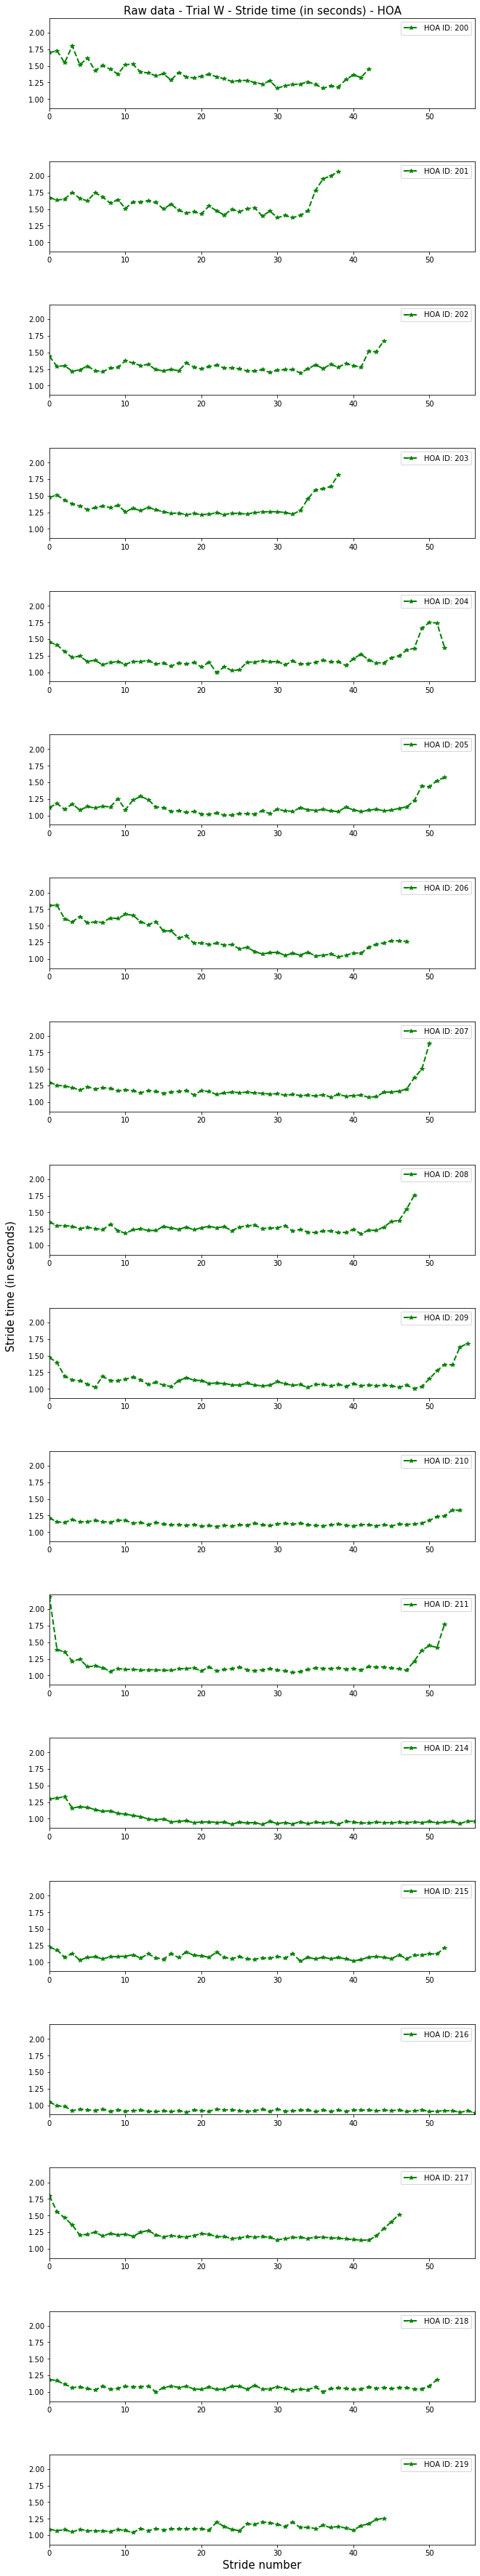

531
1


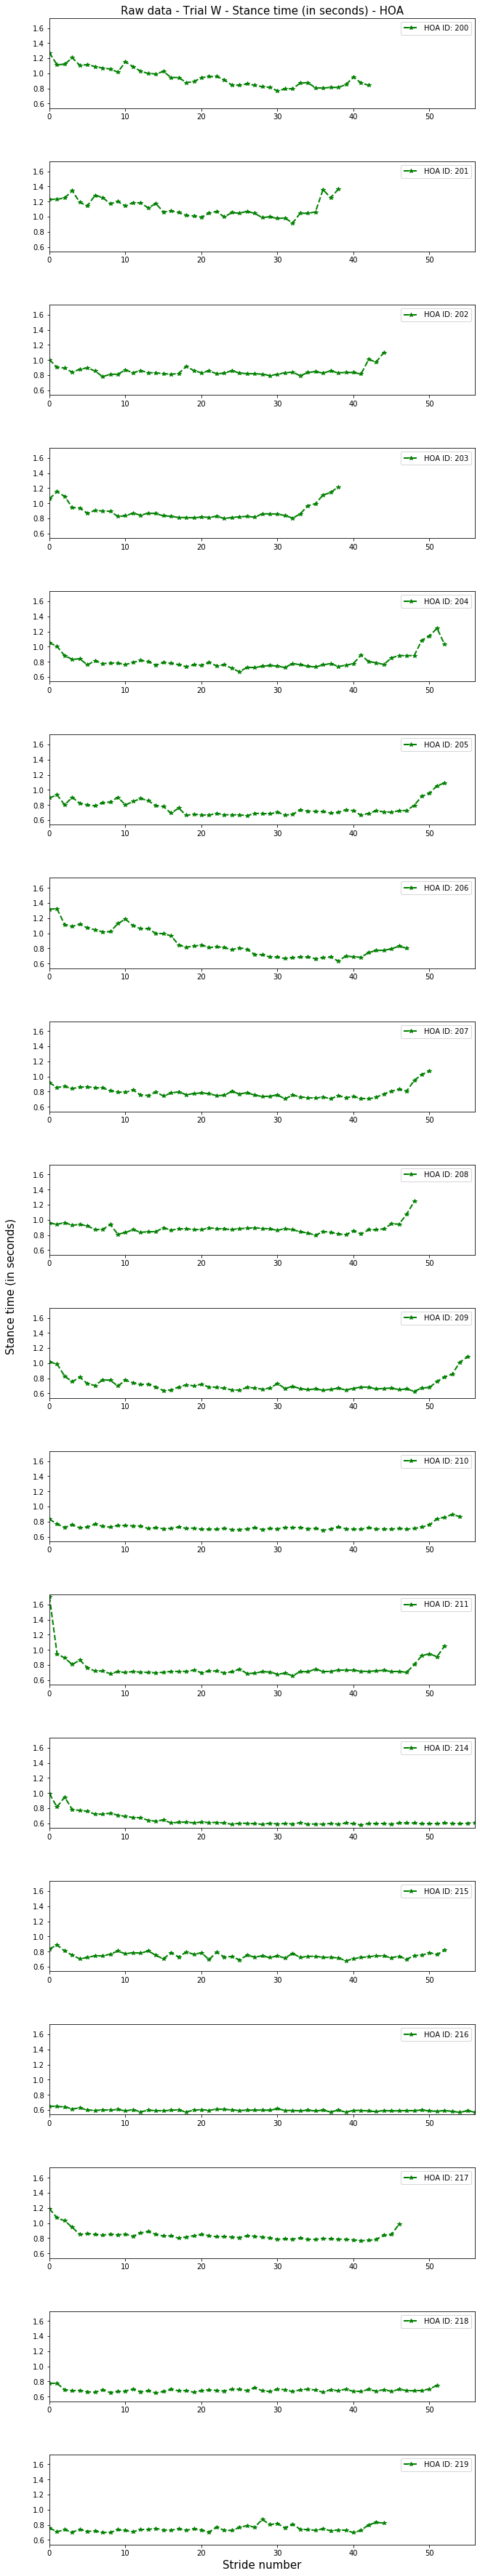

370
2


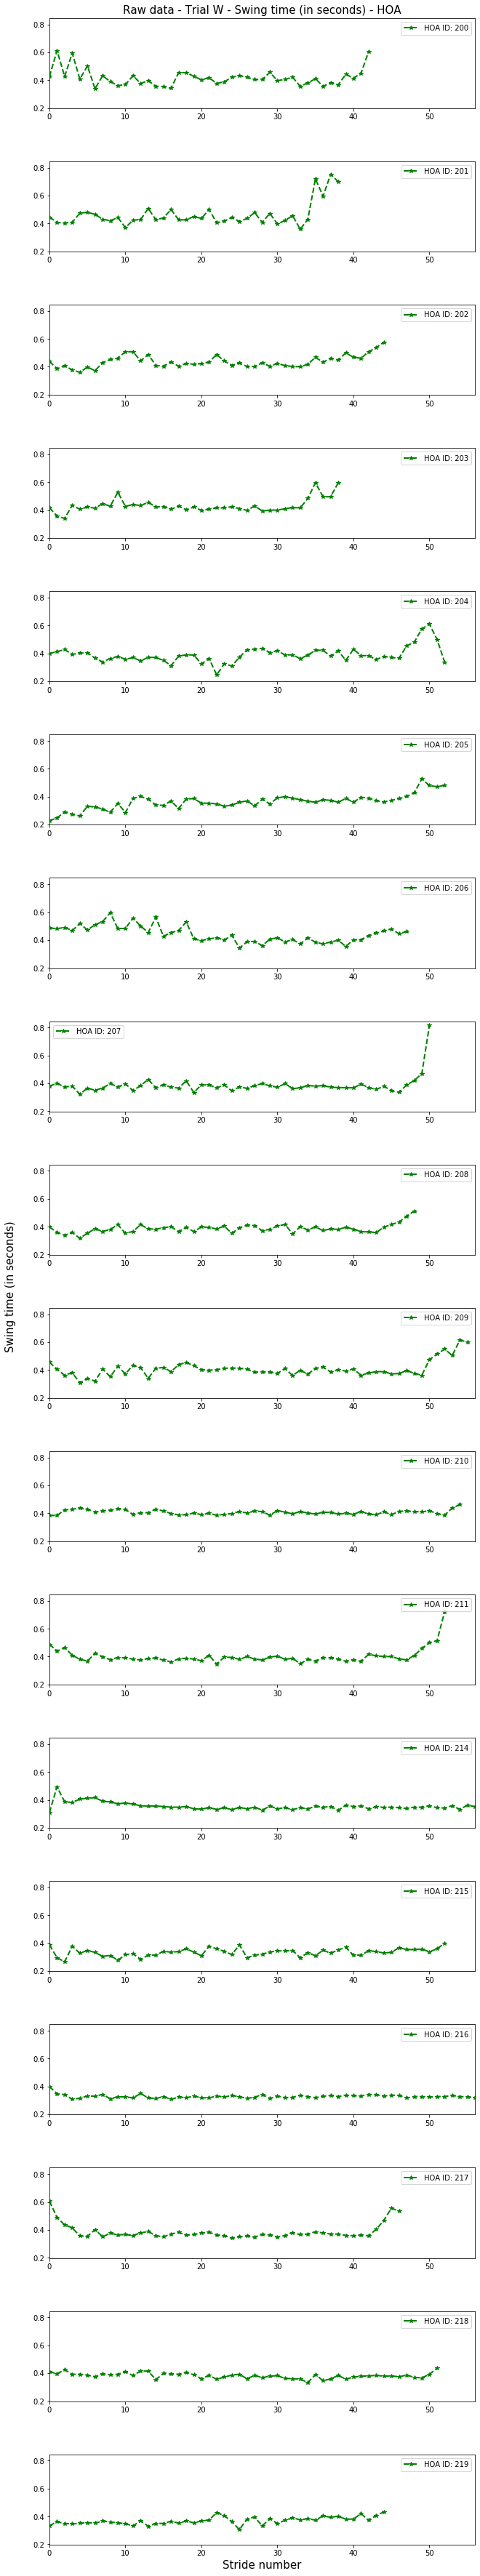

531
3


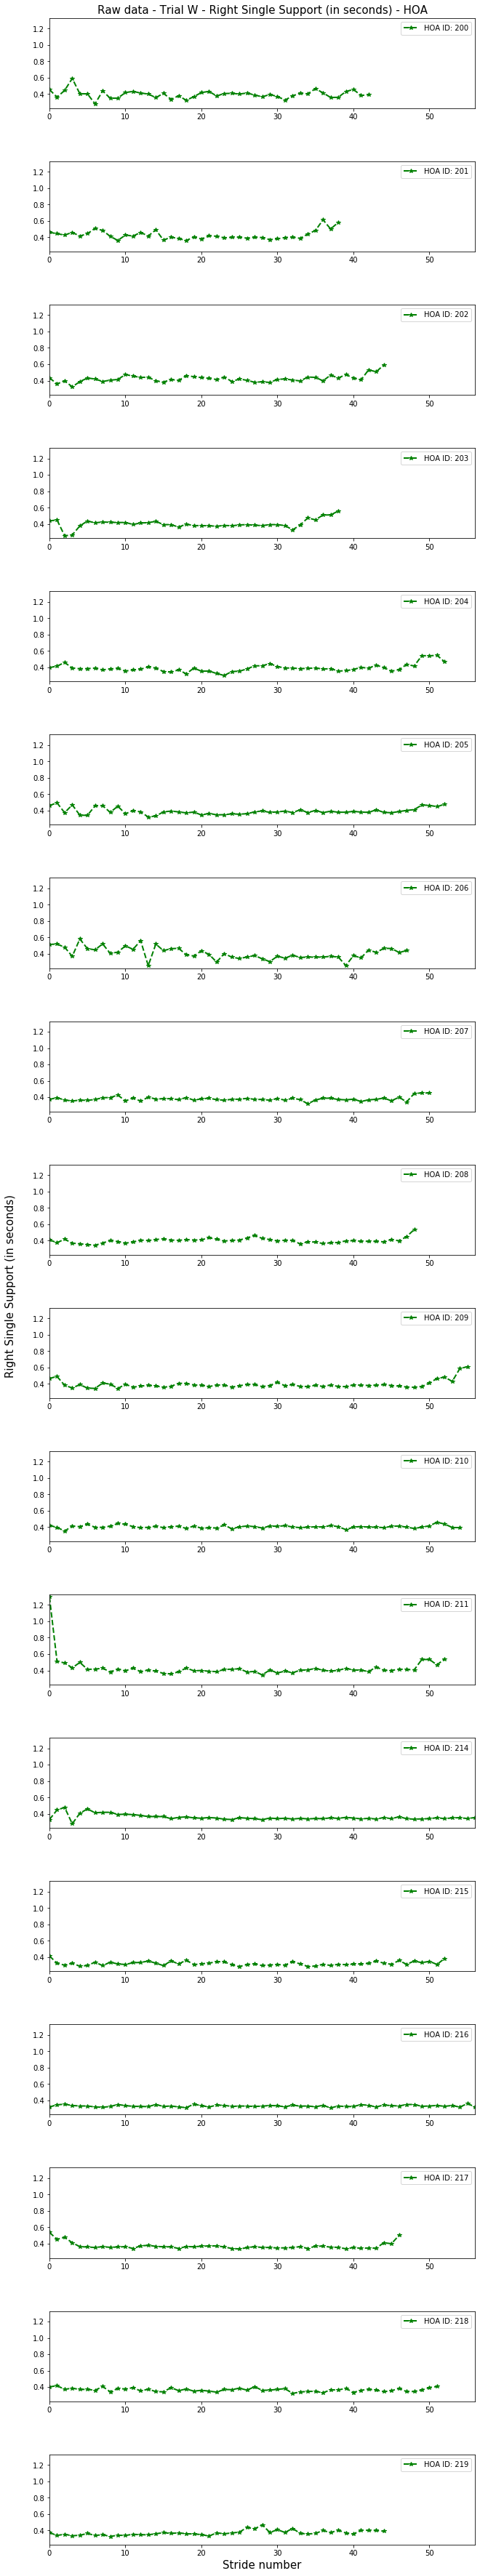

285
4


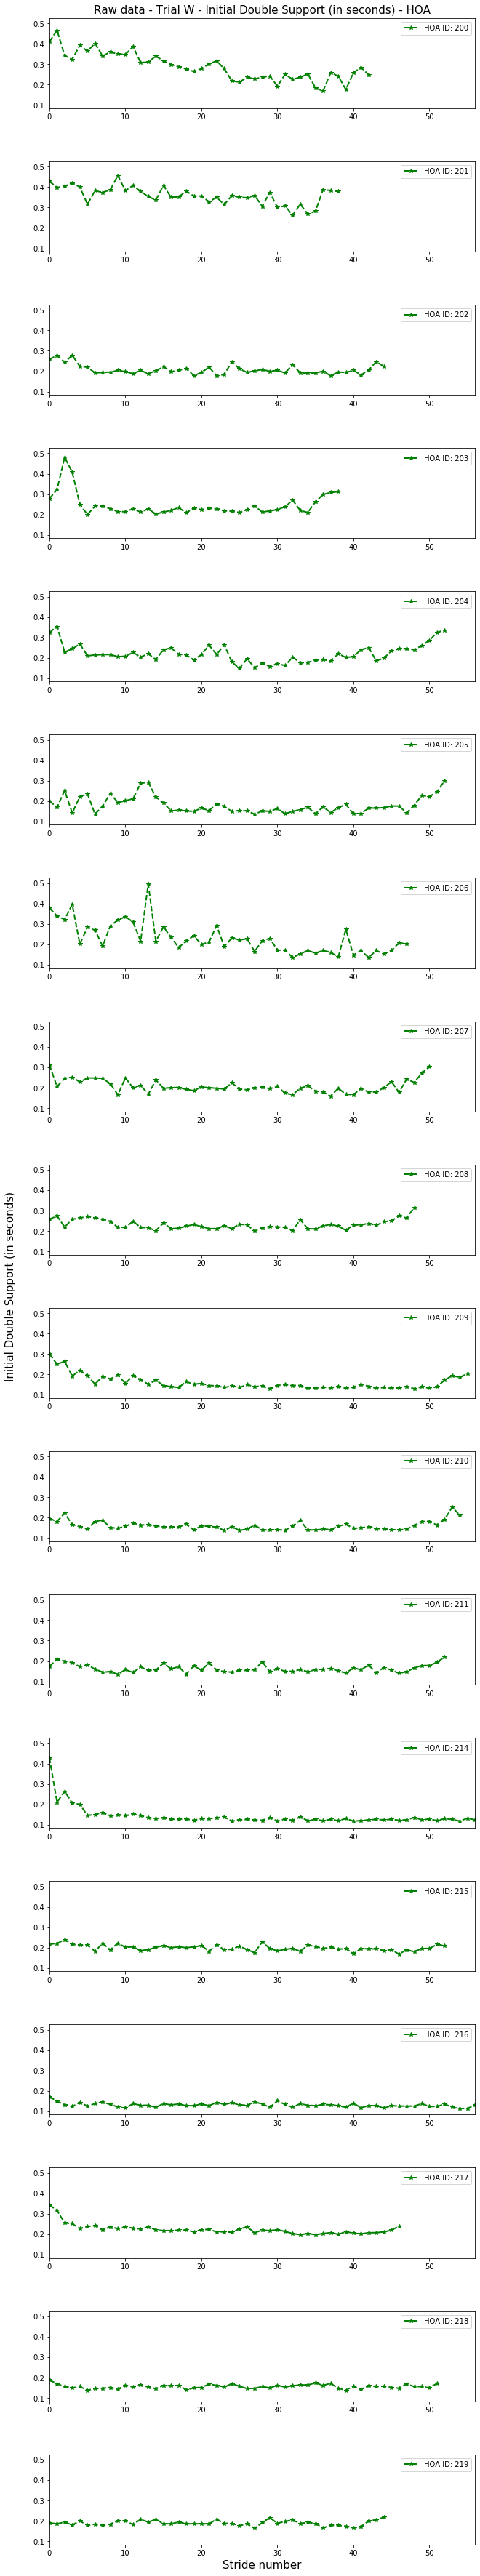

273
5


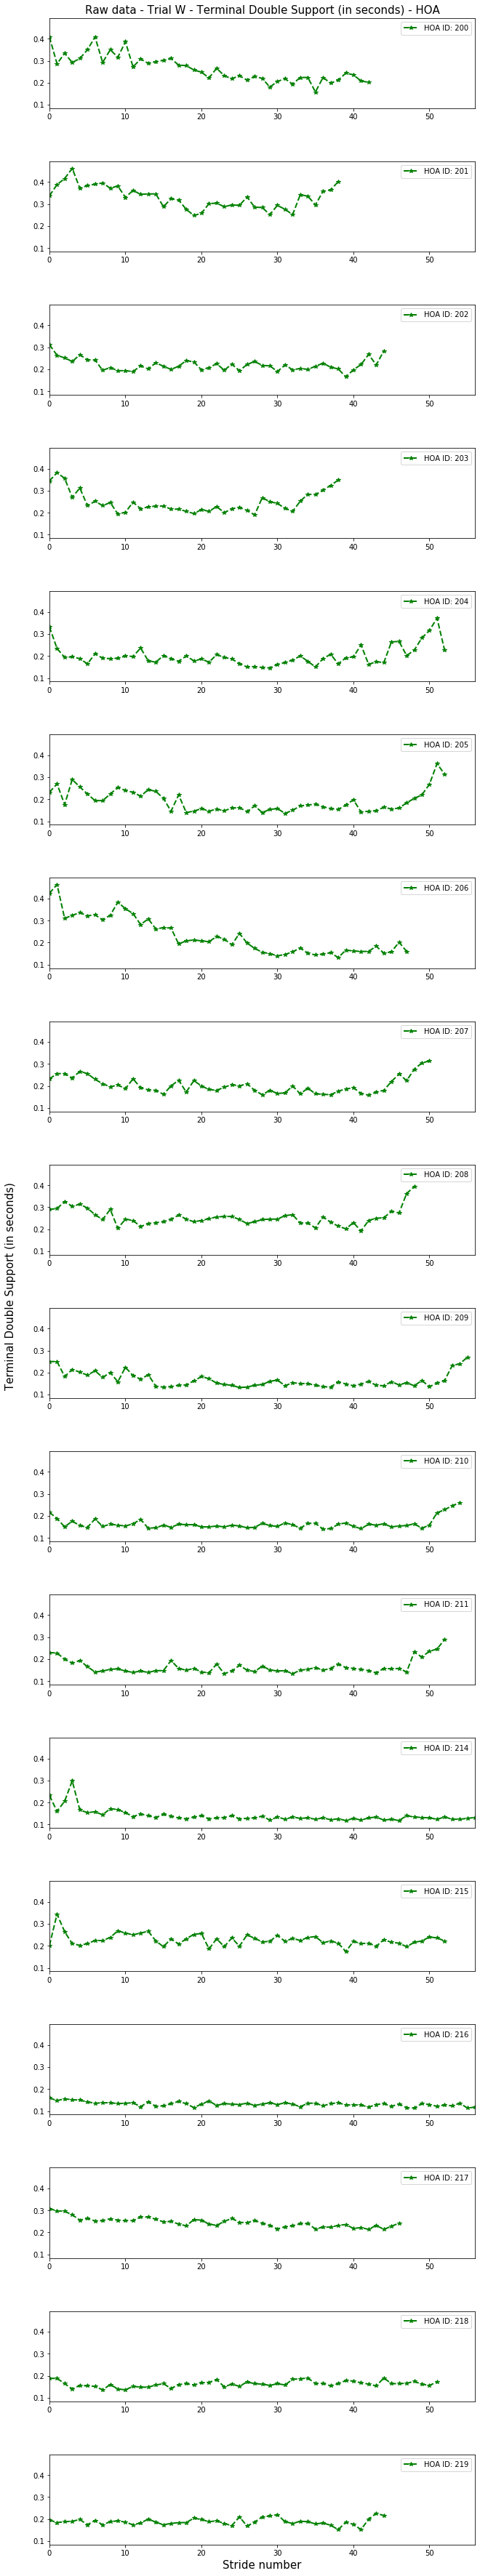

754
6


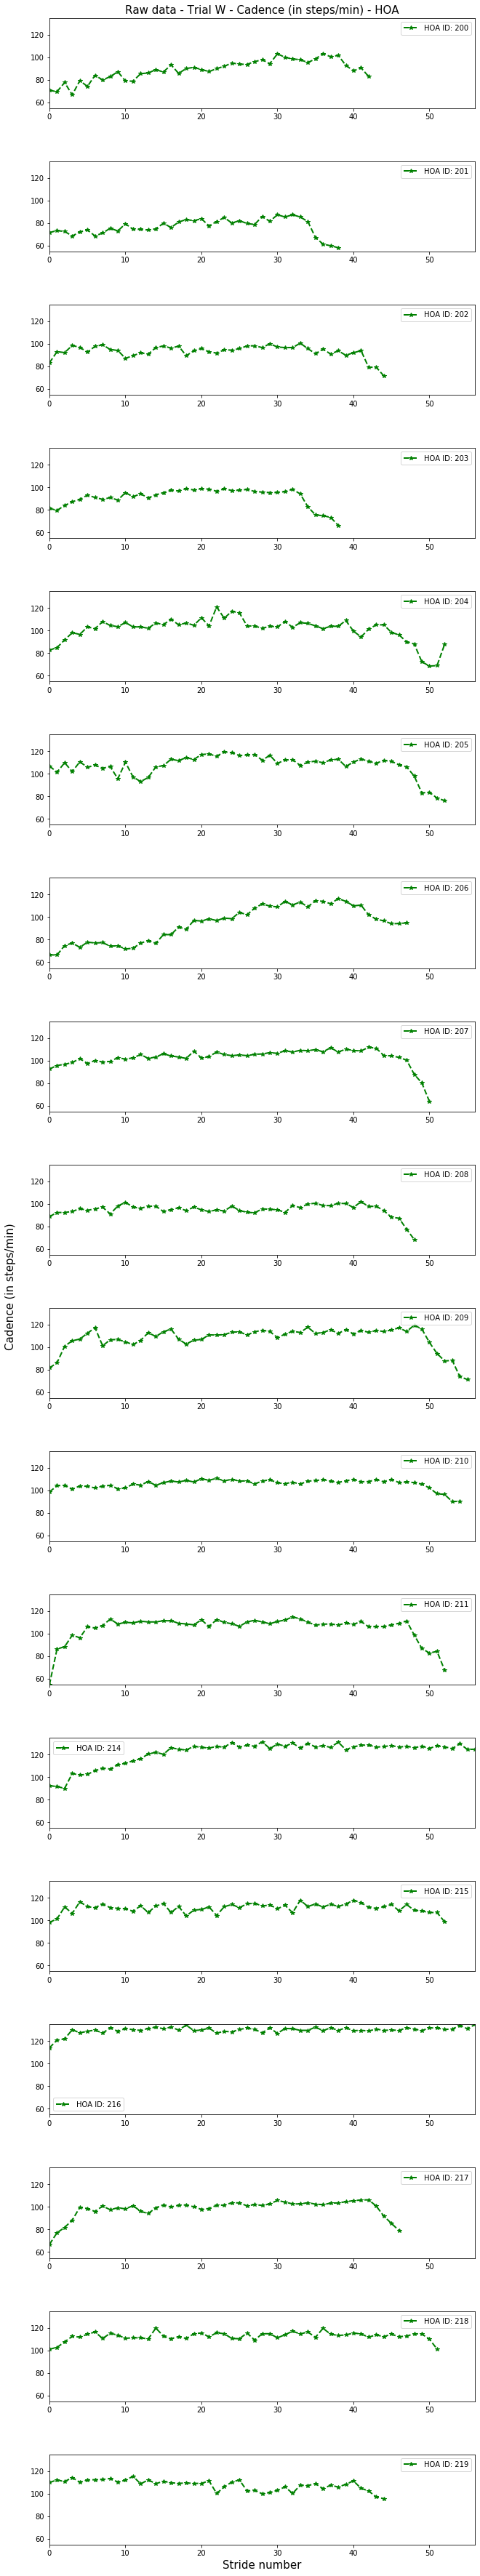

531
7


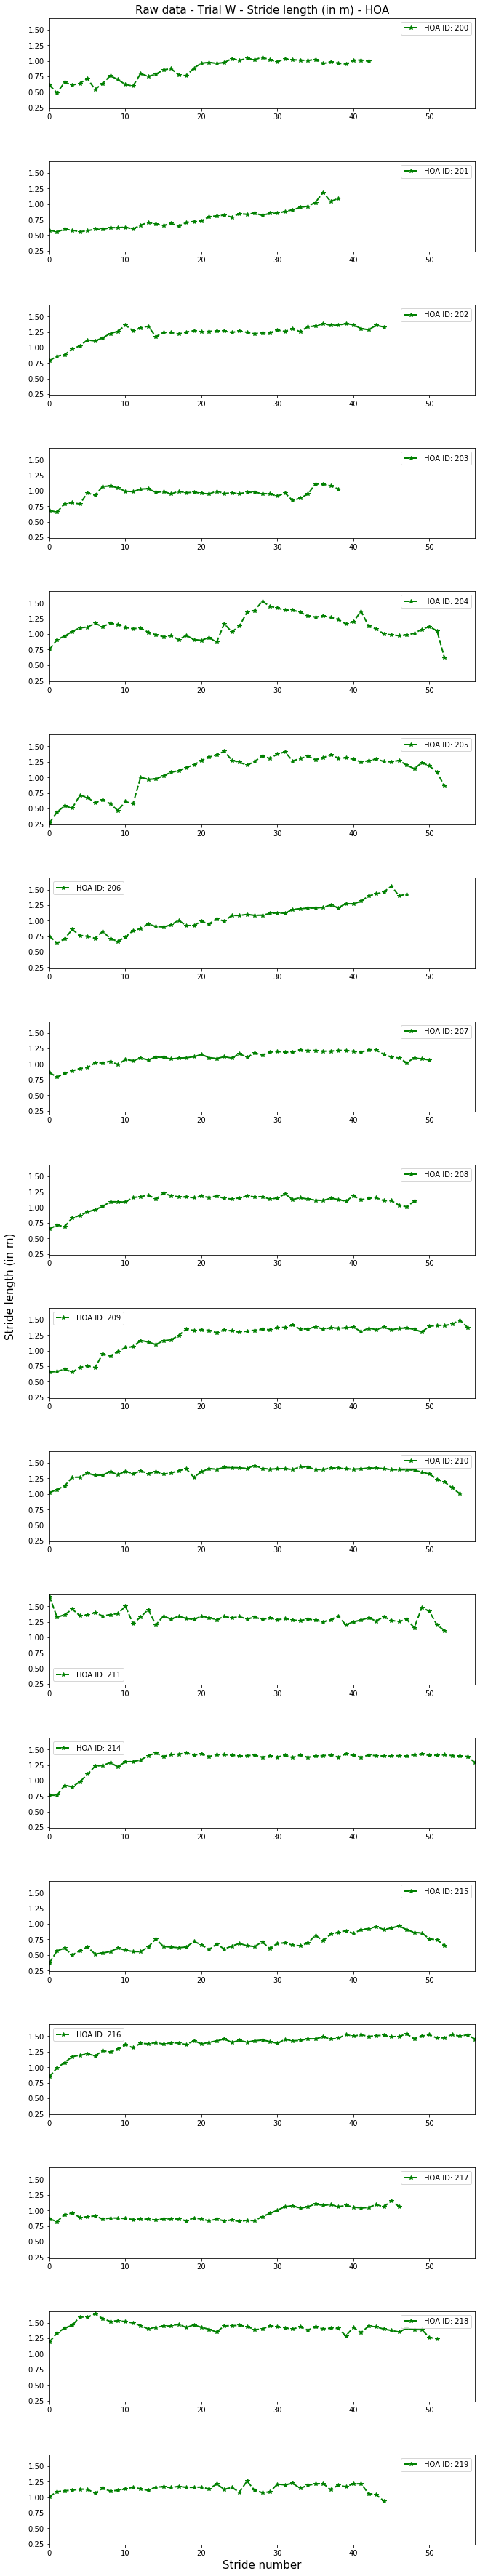

889
8


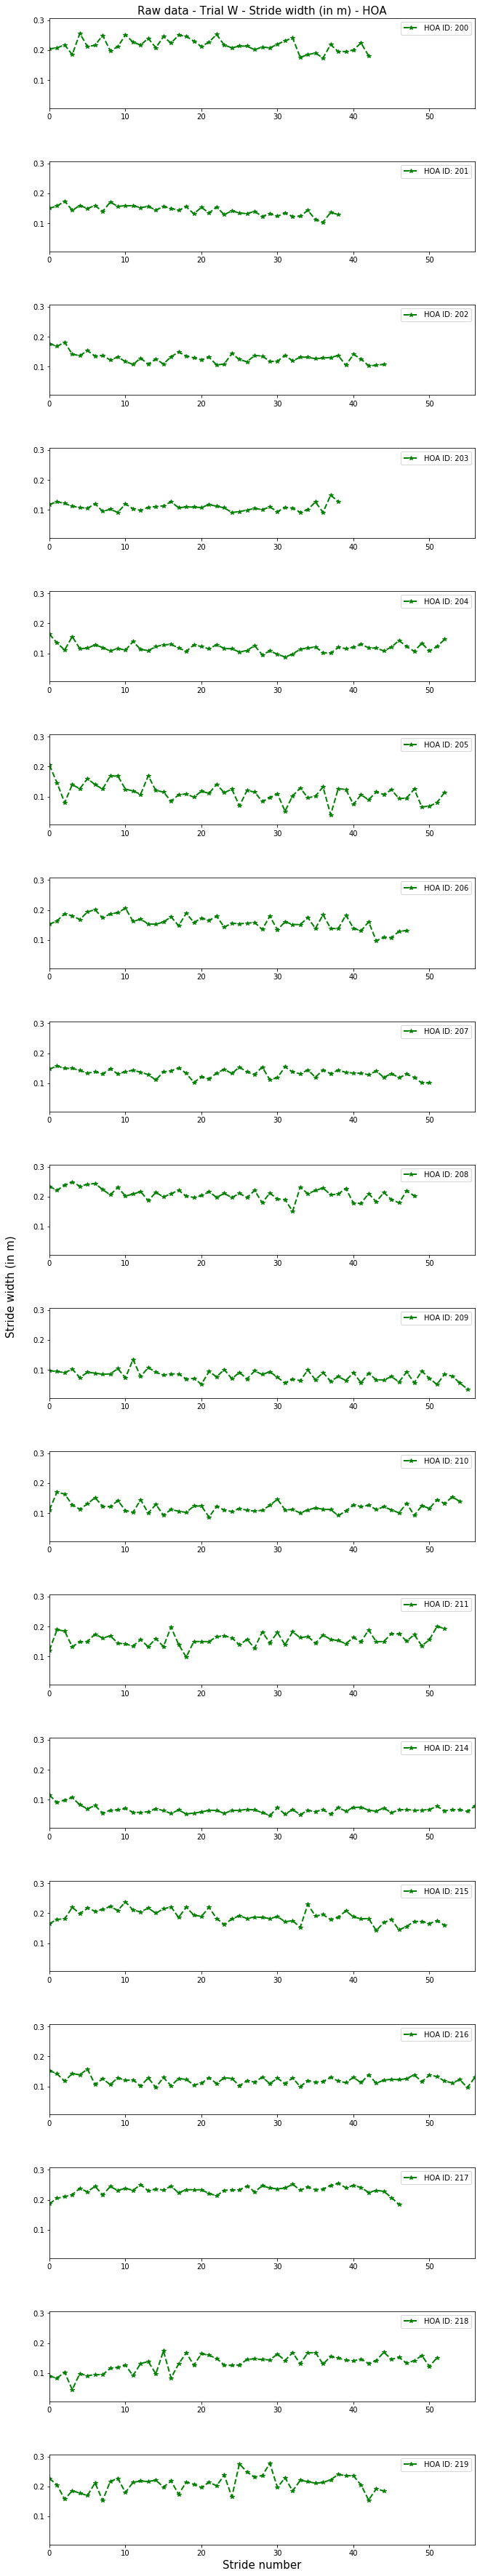

219
9


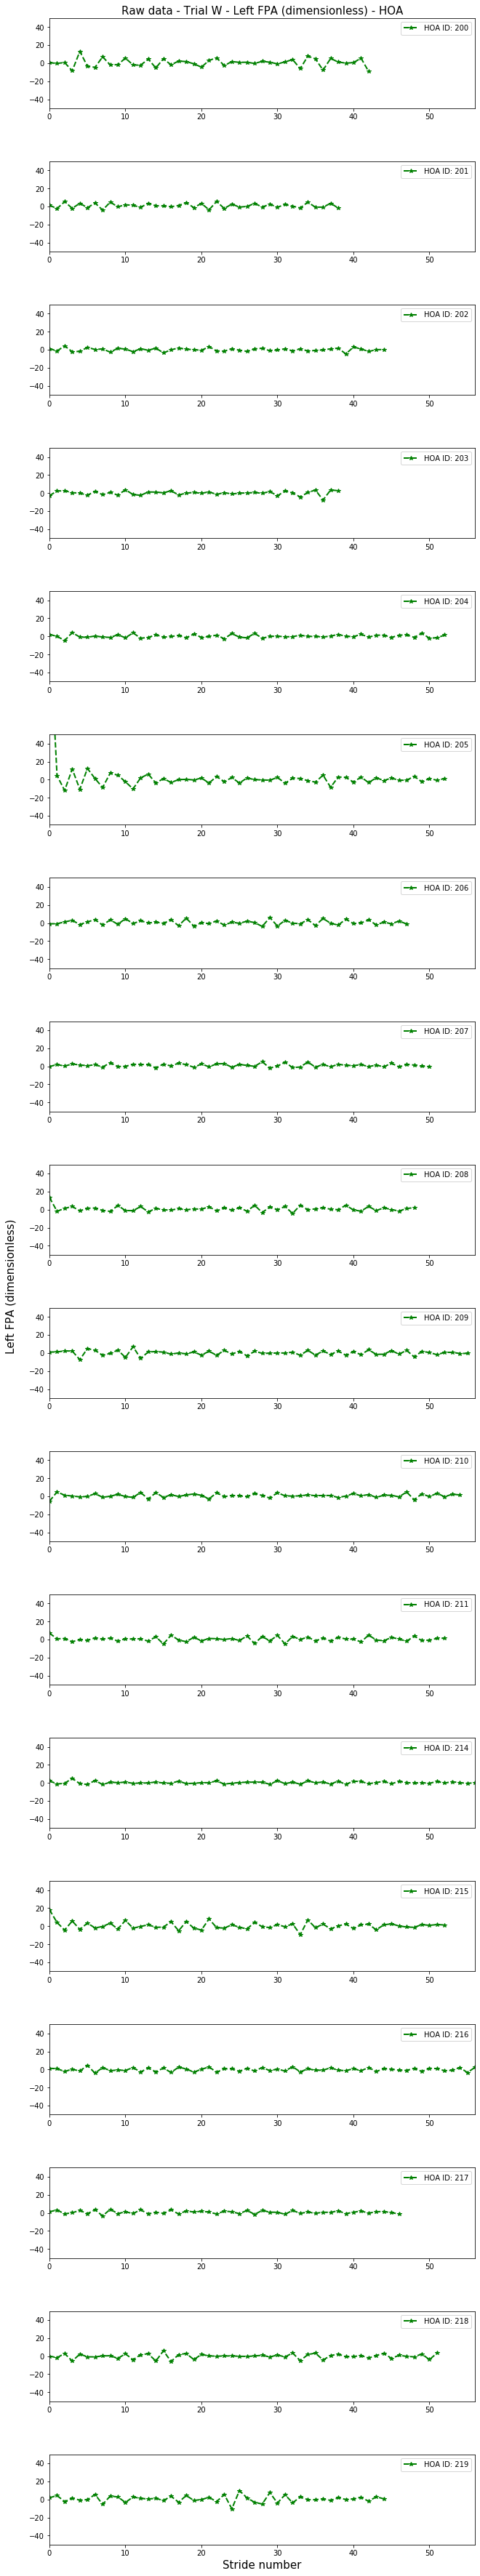

371
10


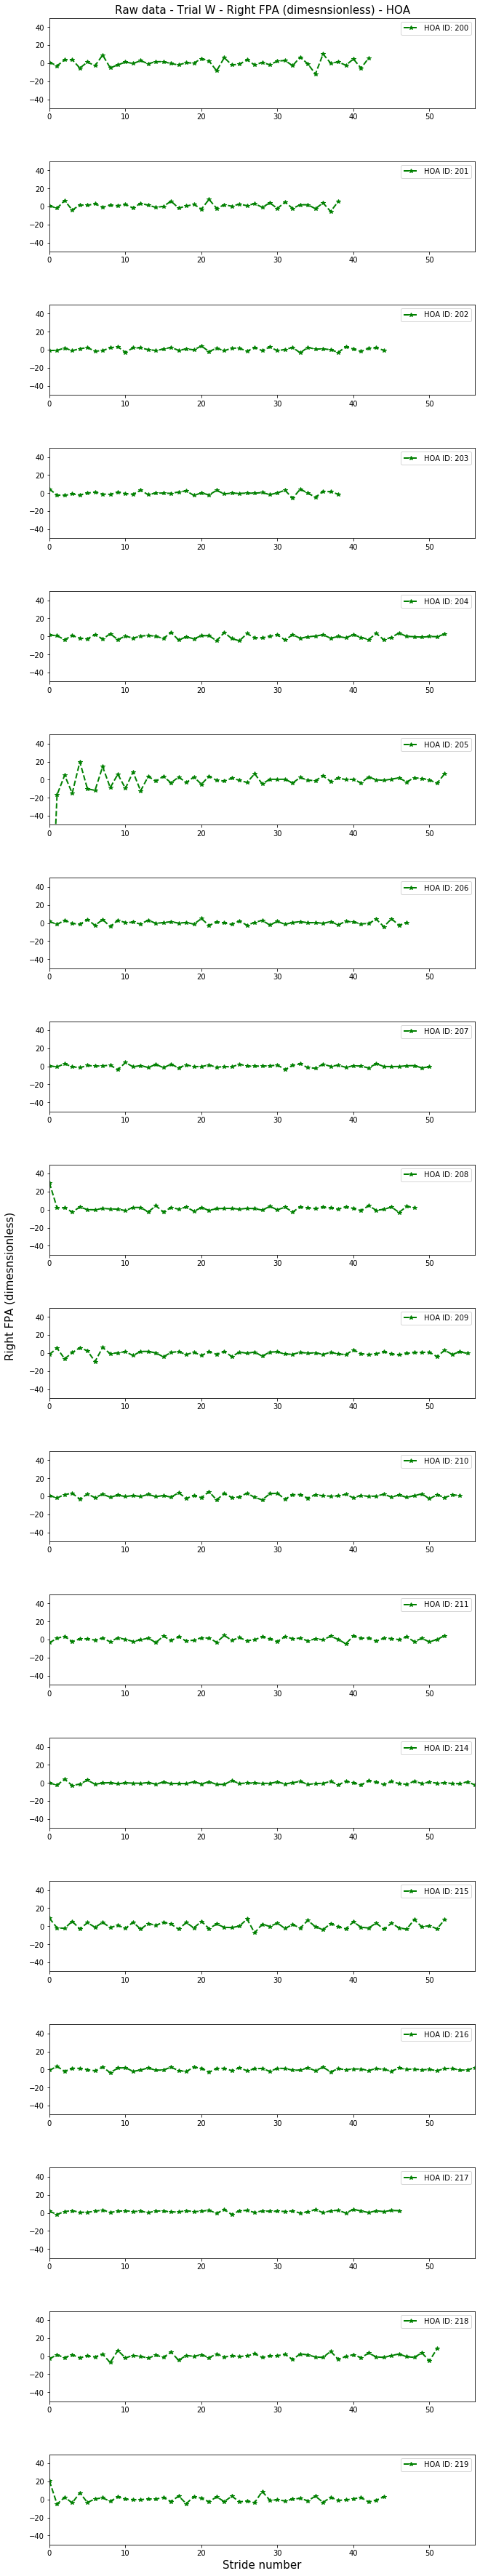

745
11


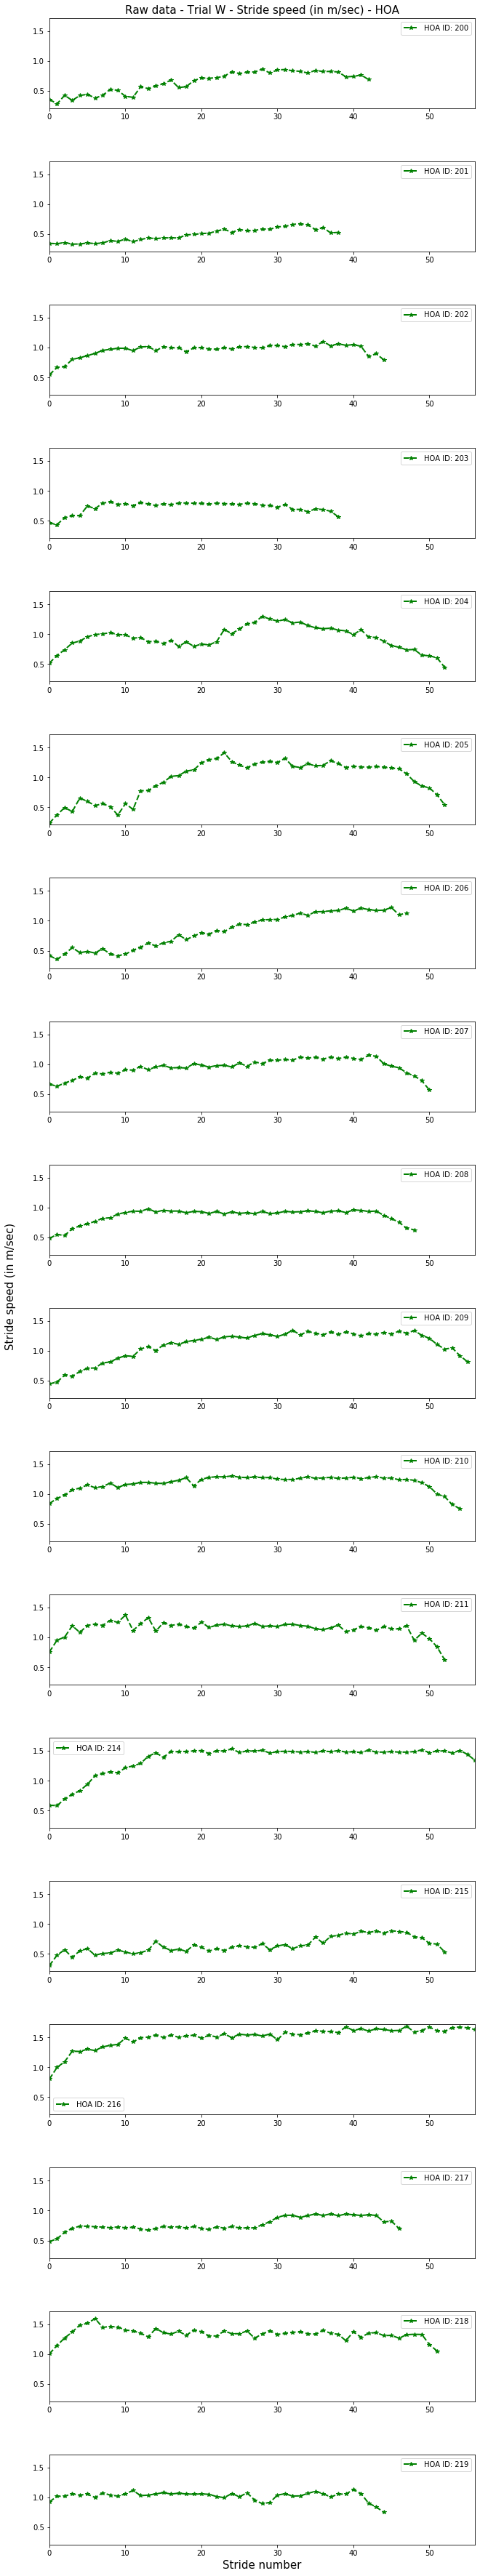

531
12


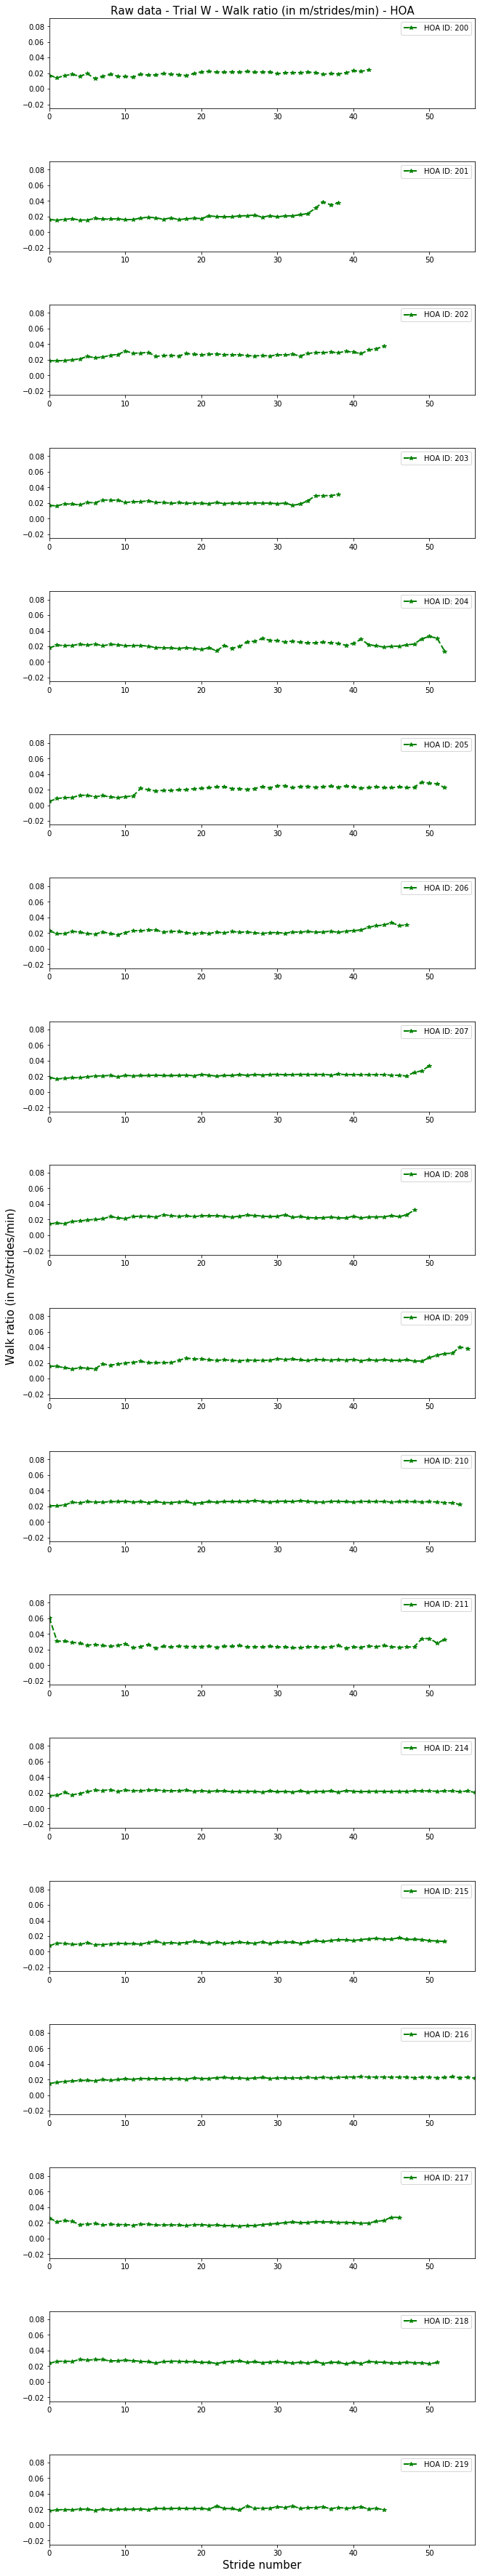

798
13


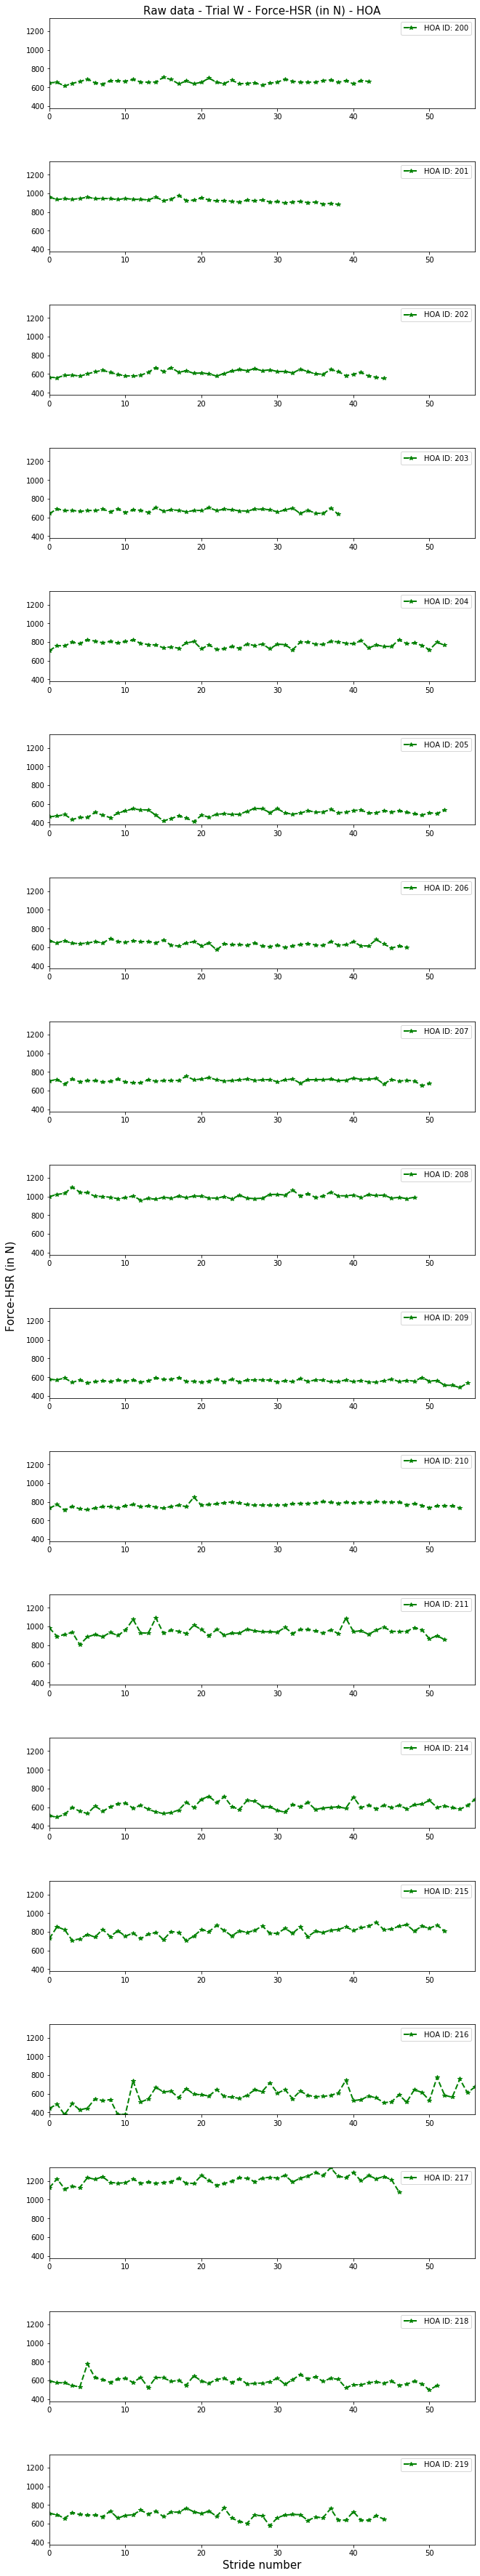

783
14


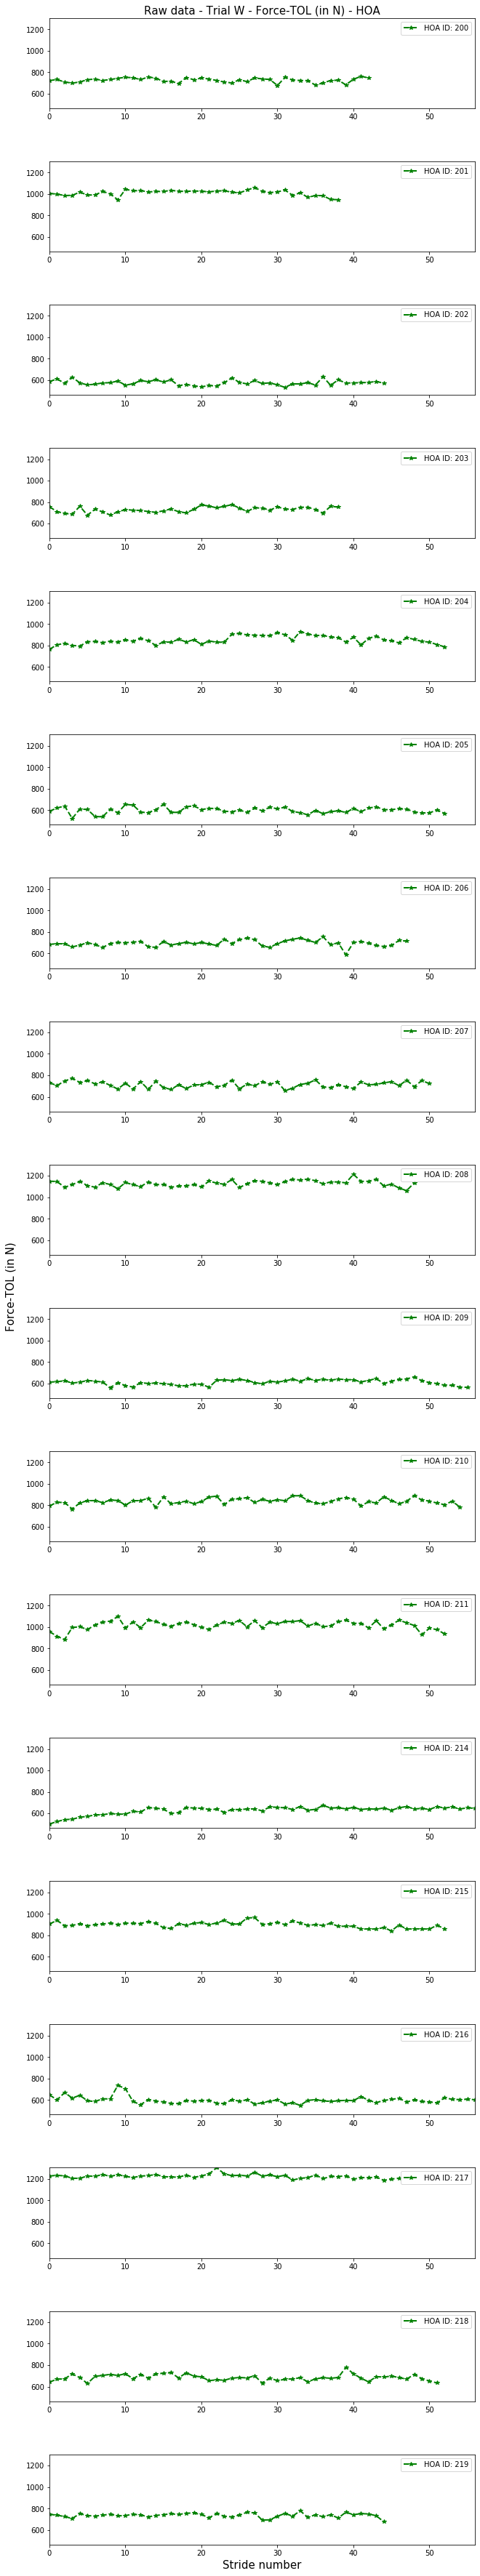

761
15


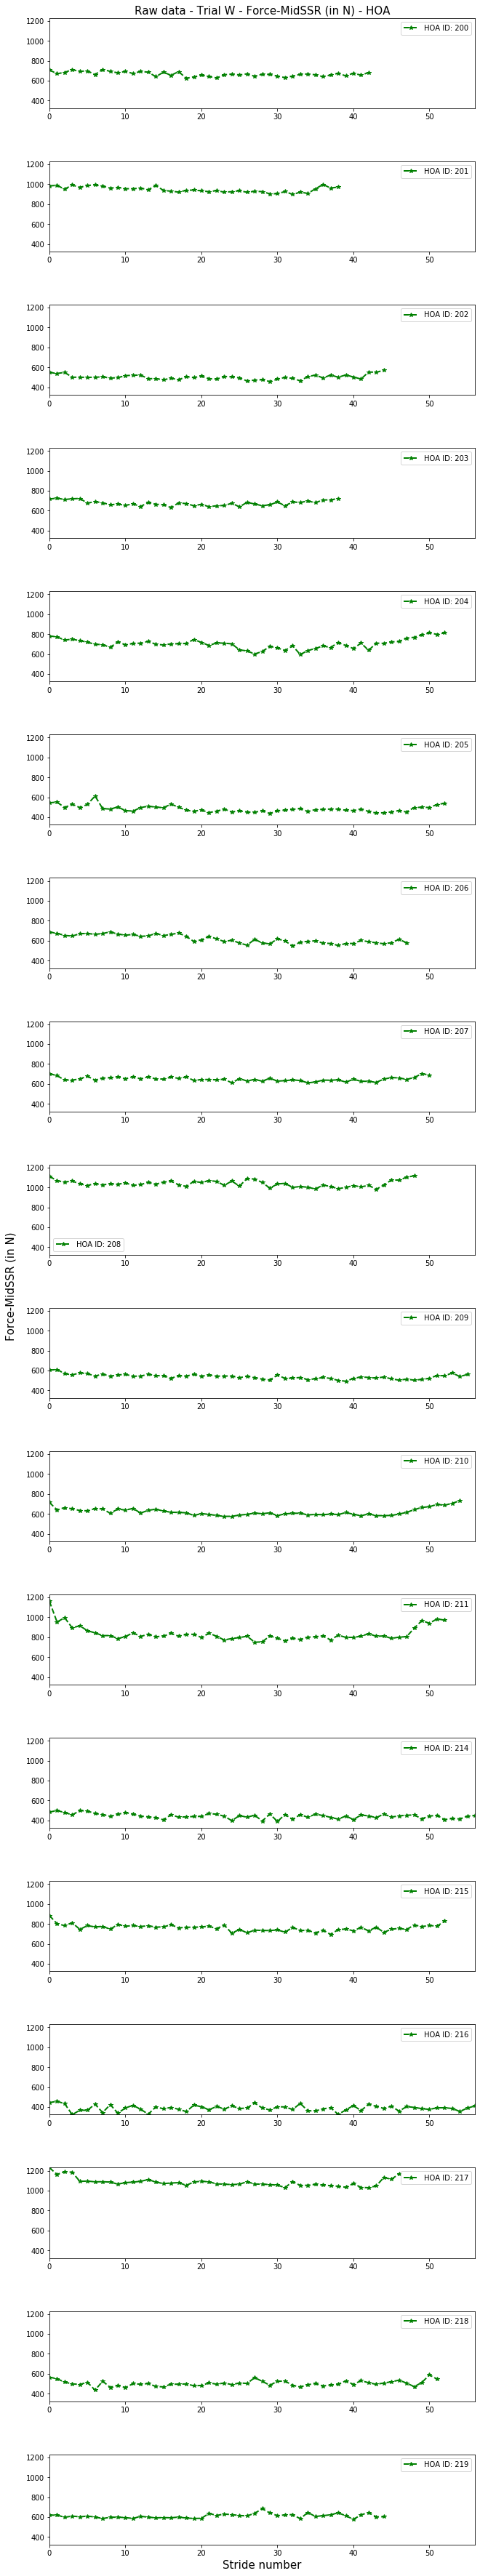

797
16


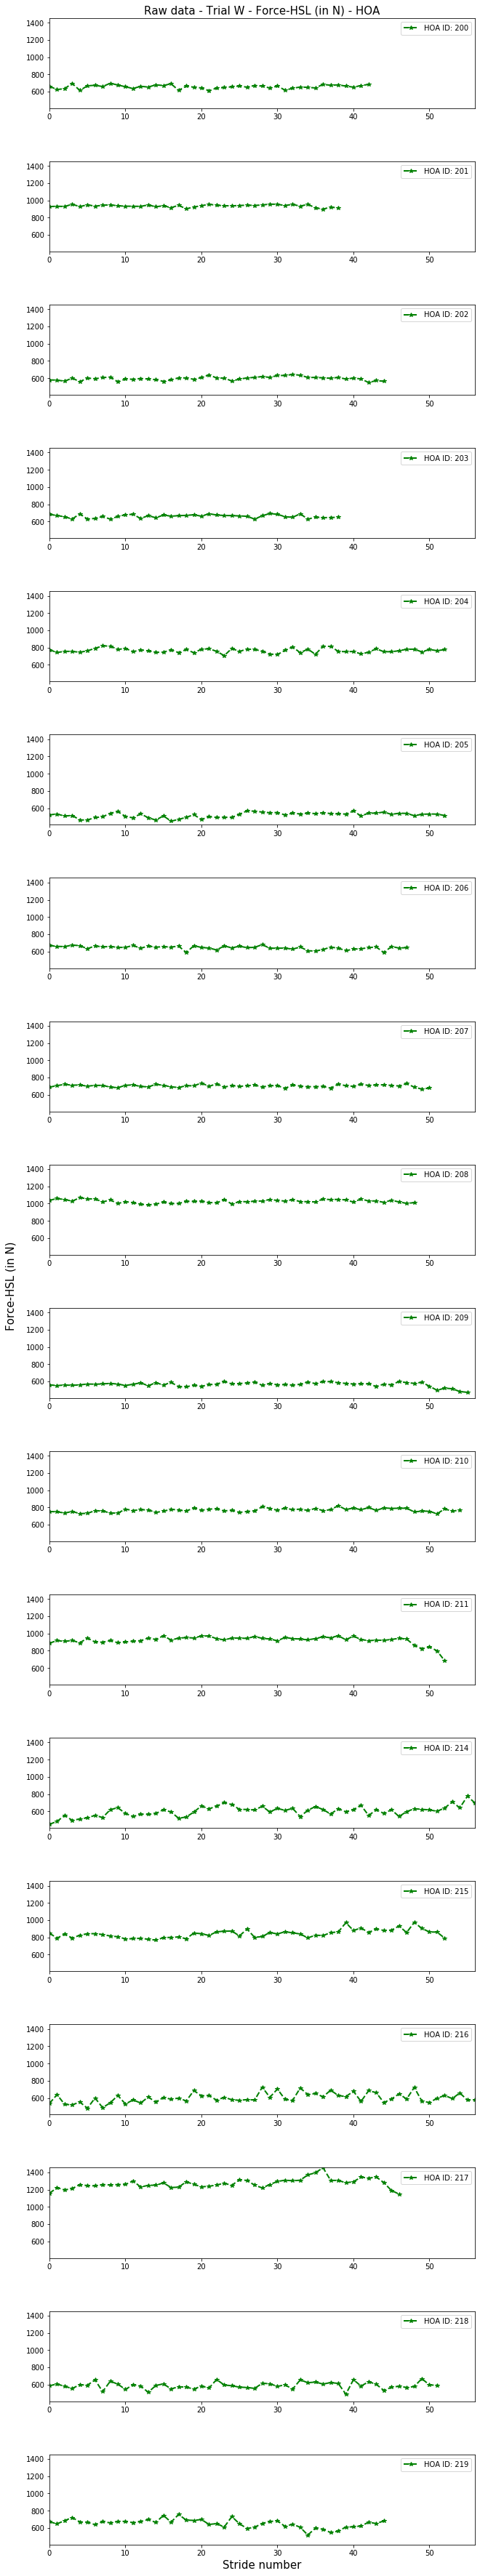

761
17


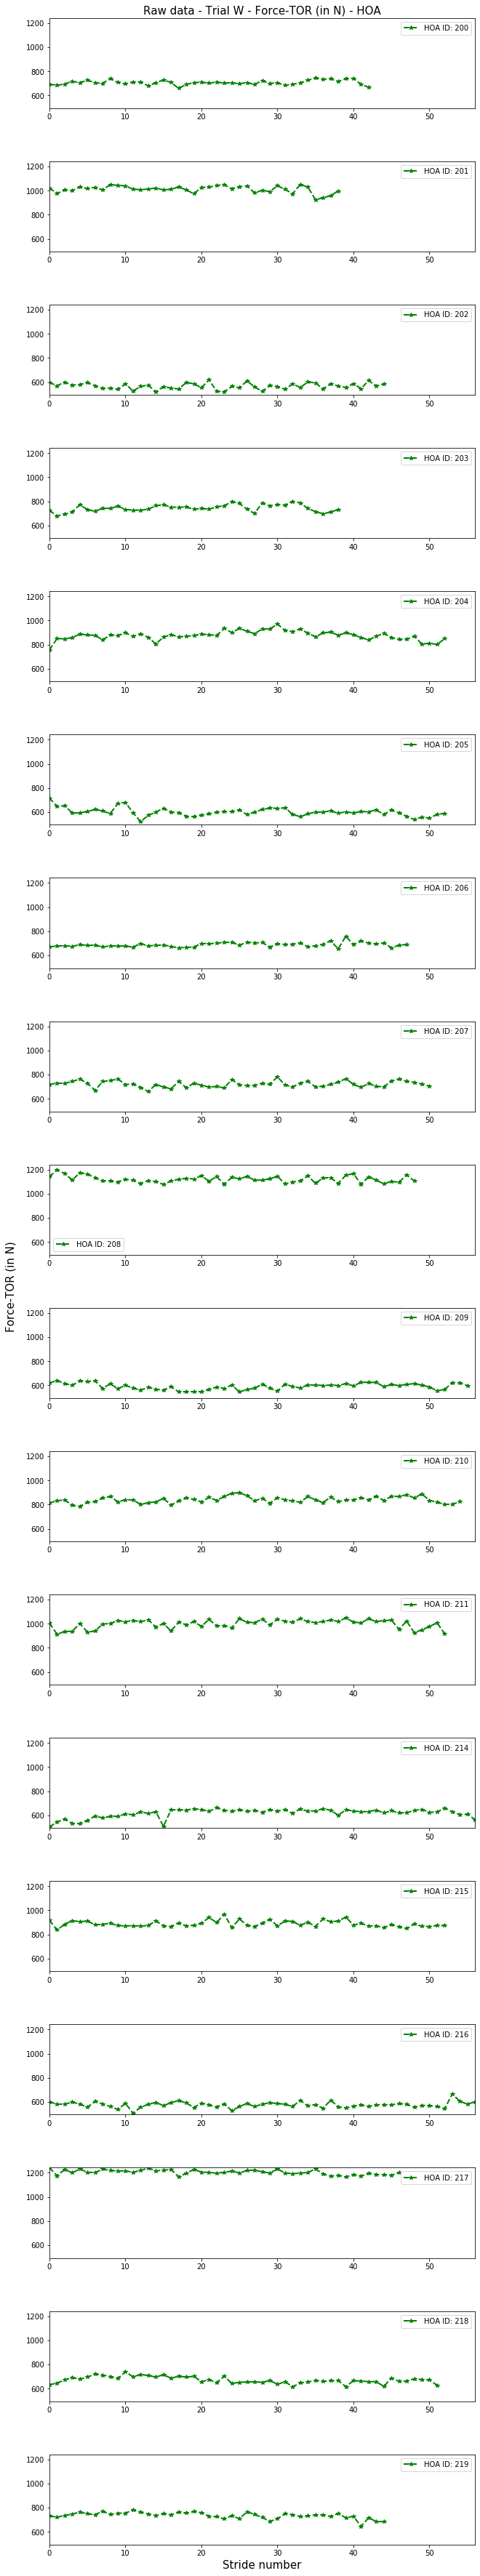

761
18


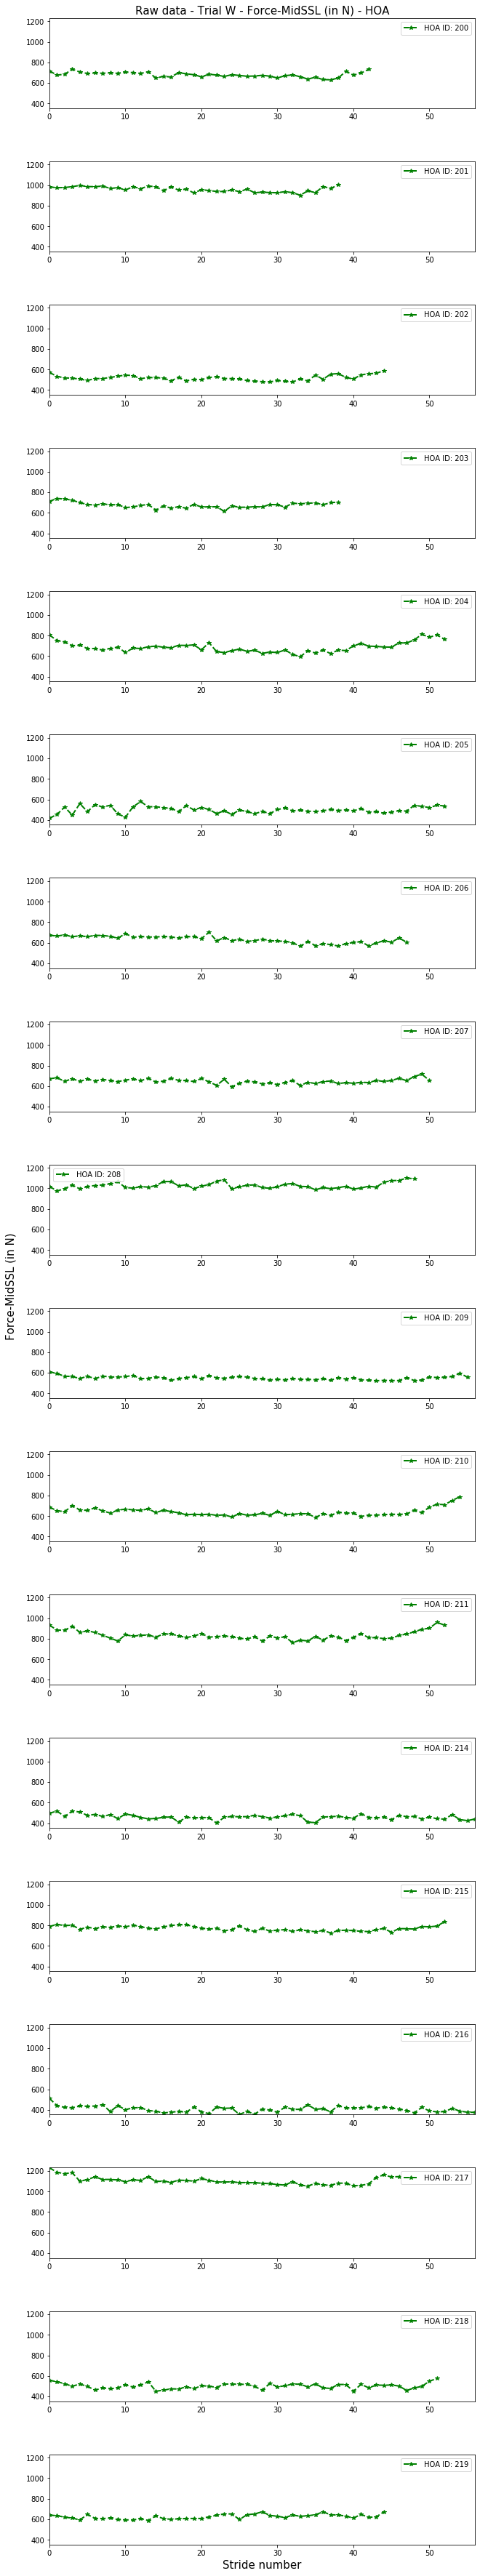

627
19


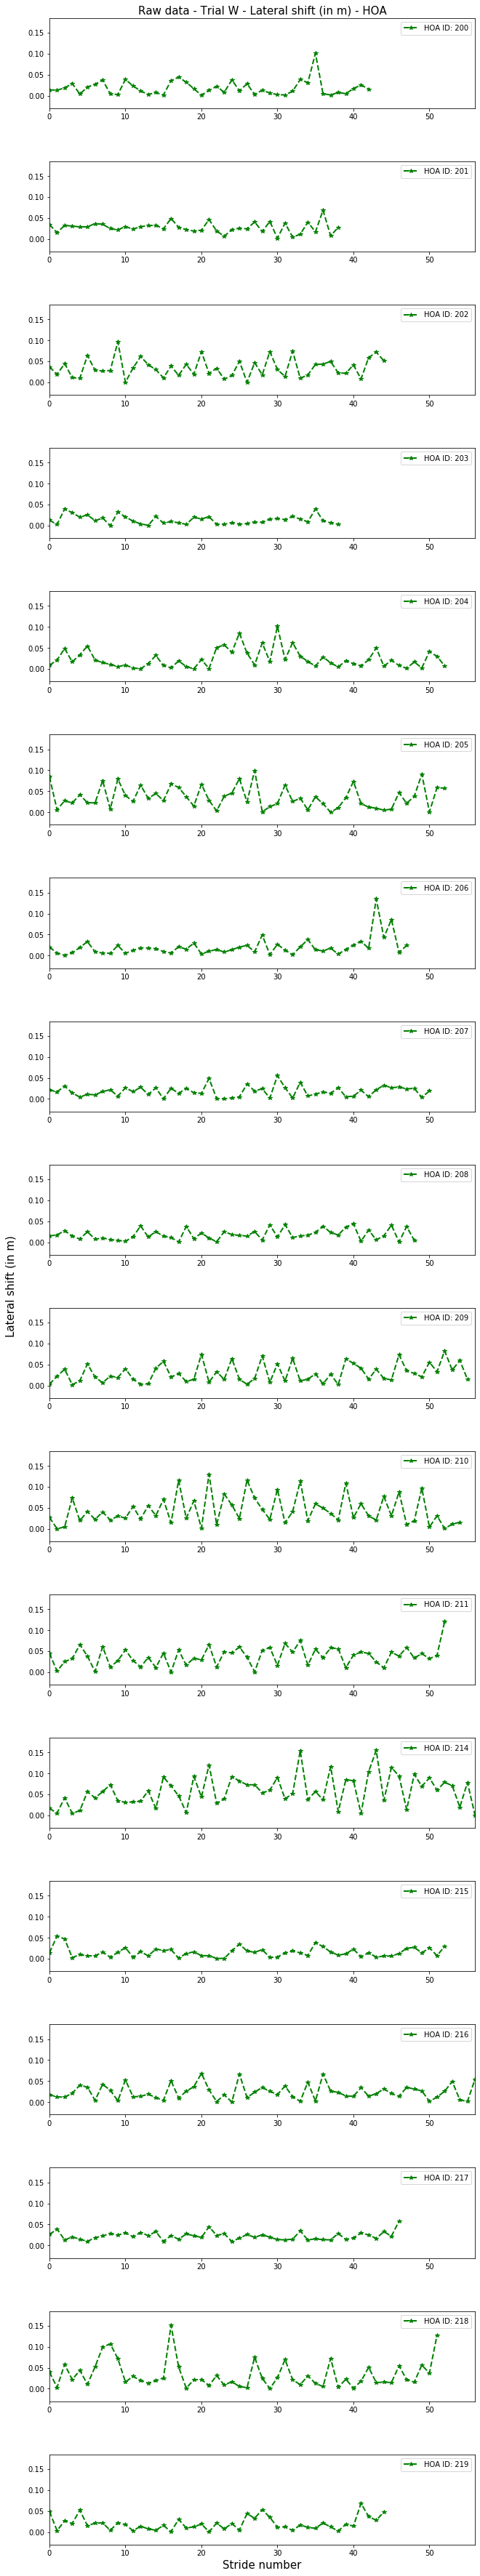

824
20


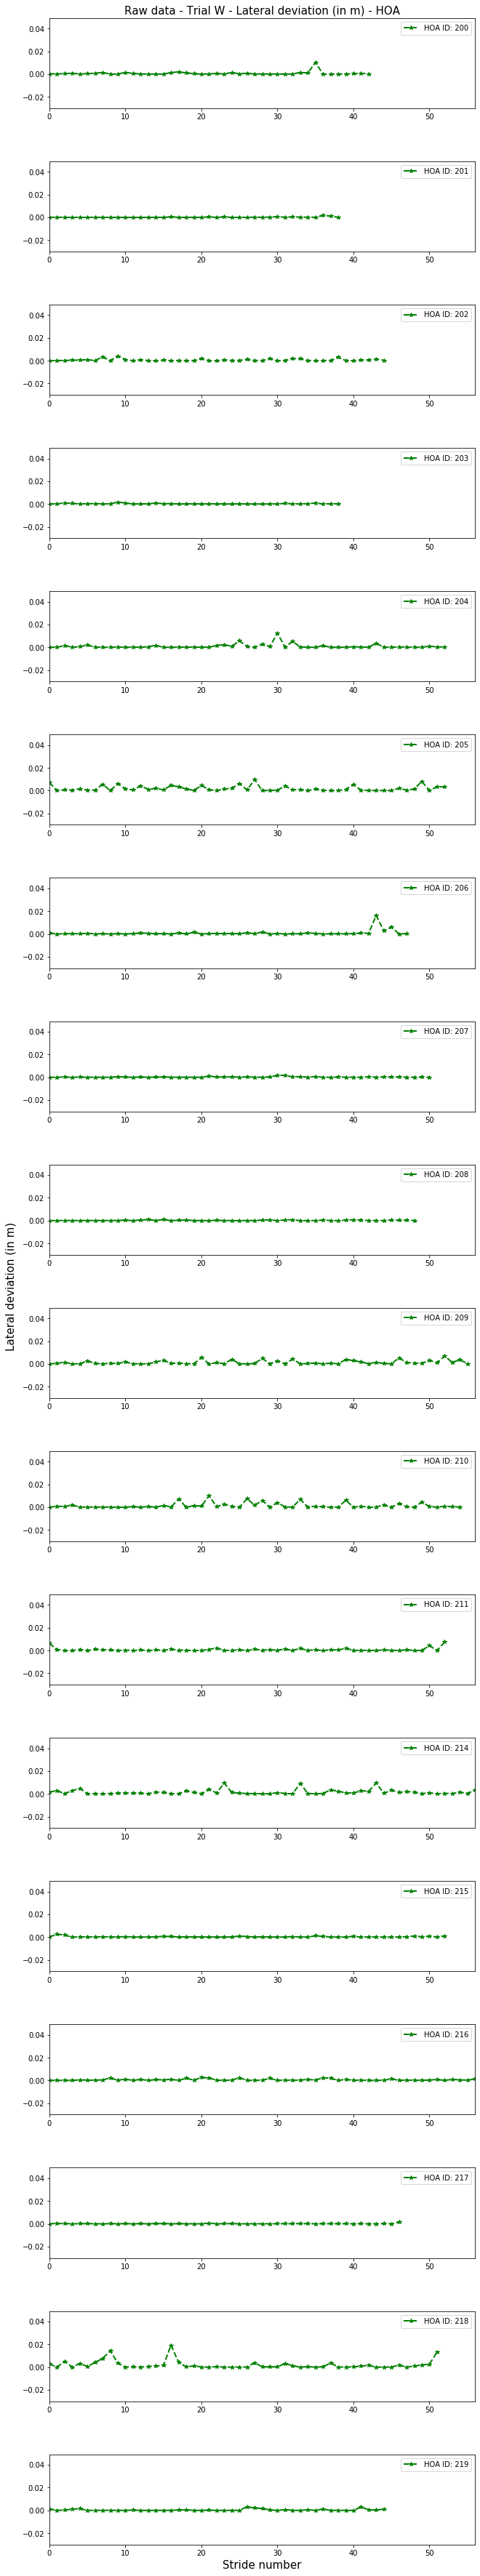

In [270]:
#Raw data - Trial W - HOA
for idx in range(21):
    plot (raw_df_trialW, 'raw', 'W', 'HOA', idx, 'Raw data - Trial W - '+ feature_display_names[idx]+' - HOA')

In [ ]:
#Raw data - Trial W - MS
for idx in range(21):
    plot (raw_df_trialW, 'raw', 'W', 'MS', idx, 'Raw data - Trial W - '+ feature_display_names[idx]+' - MS')

In [ ]:
#Raw data - Trial WT - HOA
for idx in range(21):
    plot (raw_df_trialWT, 'raw', 'WT', 'HOA', idx, 'Raw data - Trial WT - '+ feature_display_names[idx]+' - HOA')

In [ ]:
#Raw data - Trial WT - MS
for idx in range(21):
    plot (raw_df_trialWT, 'raw', 'WT', 'MS', idx, 'Raw data - Trial WT - '+ feature_display_names[idx]+' - MS')

### SizeN data

In [ ]:
#SizeN data - Trial W - HOA
for idx in range(21):
    plot (sizeN_df_trialW, 'sizeN', 'W', 'HOA', idx, 'Size normalized data - Trial W - '+ feature_display_names[idx]+' - HOA')

In [ ]:
#SizeN data - Trial W - MS
for idx in range(21):
    plot (sizeN_df_trialW, 'sizeN', 'W', 'MS', idx, 'Size normalized data - Trial W - '+ feature_display_names[idx]+' - MS')

In [ ]:
#SizeN data - Trial WT - HOA
for idx in range(21):
    plot (sizeN_df_trialWT, 'sizeN', 'WT', 'HOA', idx, 'Size normalized data - Trial WT - '+ feature_display_names[idx]+' - HOA')

In [ ]:
#SizeN data - Trial WT - MS
for idx in range(21):
    plot (sizeN_df_trialWT, 'sizeN', 'WT', 'MS', idx, 'Size normalized data - Trial WT - '+ feature_display_names[idx]+' - MS')

### RegressN data

In [ ]:
#RegressN data - Trial W - HOA
for idx in range(21):
    plot (regressN_df_trialW, 'regressN', 'W', 'HOA', idx, 'Regression normalized data - Trial W - '+ feature_display_names[idx]+' - HOA')

In [ ]:
#RegressN data - Trial W - MS
for idx in range(21):
    plot (regressN_df_trialW, 'regressN', 'W', 'MS', idx, 'Regression normalized data - Trial W - '+ feature_display_names[idx]+' - MS')

In [ ]:
#RegressN data - Trial WT - HOA
for idx in range(21):
    plot (regressN_df_trialWT, 'regressN', 'WT', 'HOA', idx, 'Regression normalized data - Trial WT - '+ feature_display_names[idx]+' - HOA')

In [ ]:
#RegressN data - Trial WT - MS
for idx in range(21):
    plot (regressN_df_trialWT, 'regressN', 'WT', 'MS', idx, 'Regression normalized data - Trial WT - '+ feature_display_names[idx]+' - MS')